In [39]:
import numpy as np
from tifffile import imread
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

# Calcium Traces

## Flurorescence Signals from a Single Pixel.

In this section, let us look at the brightness (fluorescence) of a single pixel over time. This brightness changes when calcium levels in the cell change which is an indicator that the neuron is "active". Plotting how the fluorescence changes shows us when "activity" might have happened in that pixel. 

Reading tiff file (T x W x H)

In [2]:
cell1 = imread('data/cell1.tif')
cell1.shape

(2000, 21, 27)

In [3]:
cell2 = imread('data/cell2.tif')
cell2.shape

(2000, 23, 20)

In [4]:
cell3 = imread('data/cell3.tif')
cell3.shape

(2000, 15, 20)

Plotting single frames

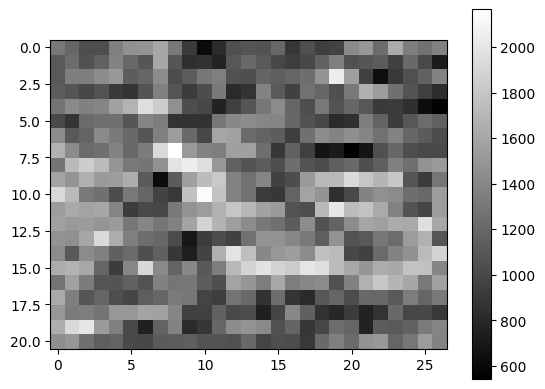

In [5]:
plt.imshow(cell1[0], cmap='gray')
plt.colorbar()

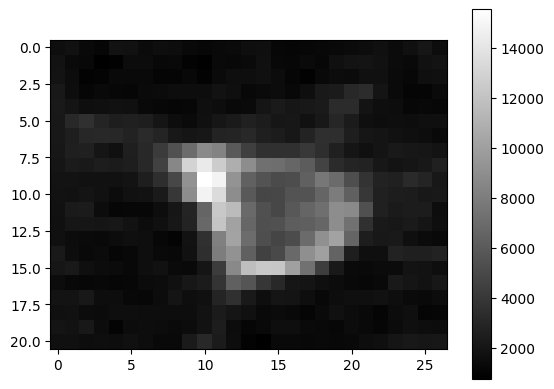

In [6]:
plt.imshow(cell1[115], cmap='gray')
plt.colorbar()

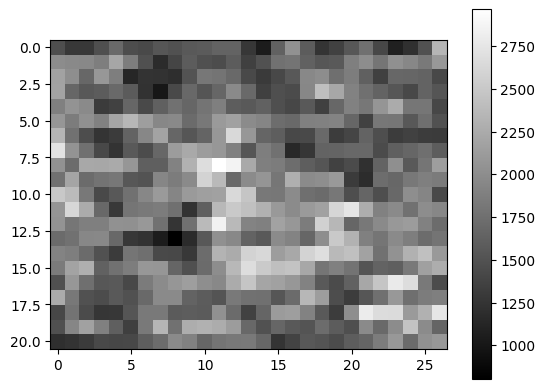

In [7]:
plt.imshow(cell1[-1], cmap='gray')
plt.colorbar()

Selecting single pixel from single frame

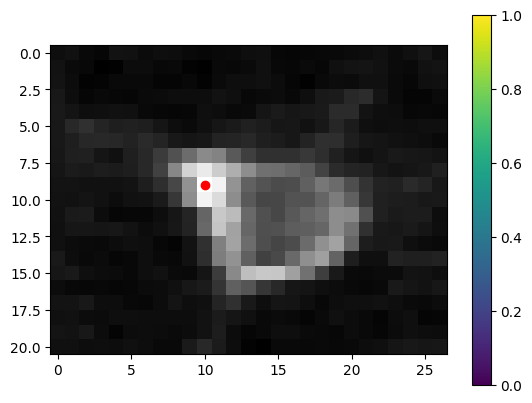

In [8]:
plt.imshow(cell1[115], cmap='gray')
plt.scatter(10, 9, color='r')
plt.colorbar()

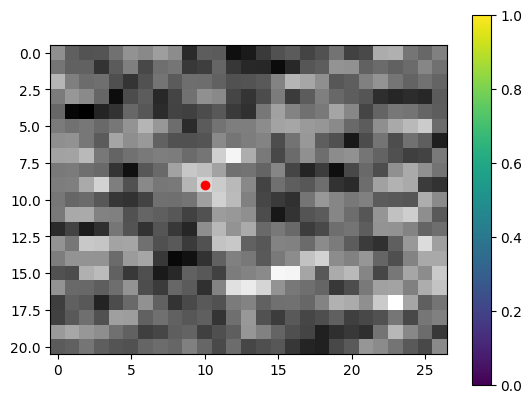

In [9]:
plt.imshow(cell1[3], cmap='gray')
plt.scatter(10, 9, color='r')
plt.colorbar()

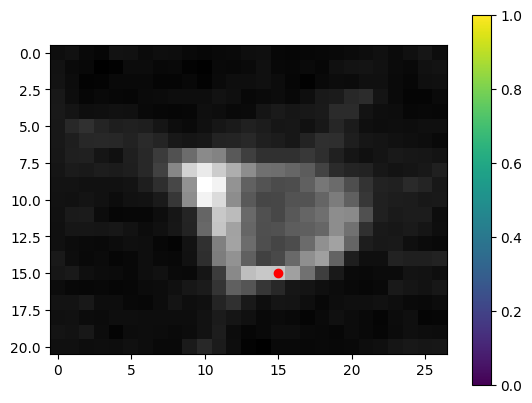

In [10]:
plt.imshow(cell1[115], cmap='gray')
plt.scatter(15, 15, color='r')
plt.colorbar()

Getting value of single pixel in single frame (movie[frame, height, width])

In [11]:
pixel_value = cell1[115, 9, 10]
pixel_value

np.uint16(15545)

In [12]:
pixel_value = cell1[3, 9, 10]
pixel_value

np.uint16(1764)

In [13]:
pixel_value = cell1[-1, 15, 15]
pixel_value

np.uint16(2422)

Getting value of single pixel from all frames and plotting it

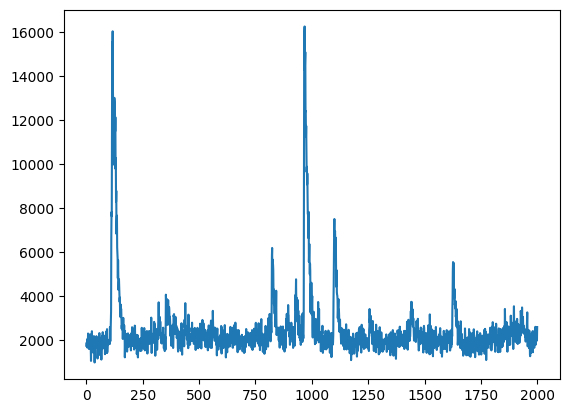

In [14]:
pixel_trace = cell1[:, 9, 10]
plt.plot(pixel_trace)

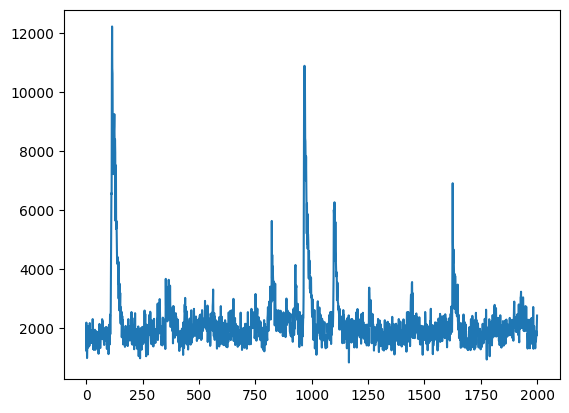

In [15]:
pixel_trace = cell1[:, 15, 15]
plt.plot(pixel_trace)

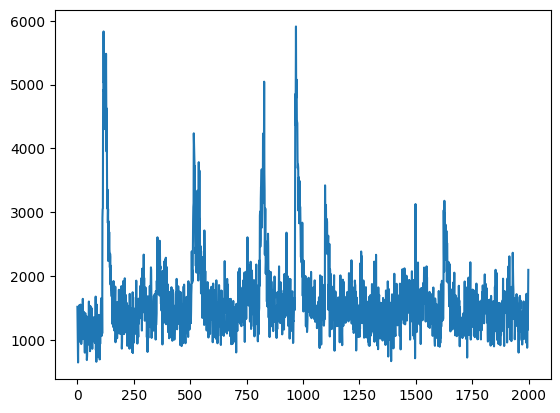

In [16]:
pixel_trace = cell1[:, 11, 15]
plt.plot(pixel_trace)

## Neuropil Correction.

The brightness we see in a pixel is, usually, not just from the cell we care about. It also includes light from nearby tissue called neuropil. To get a cleaner signal, we subtract a portion of this surrounding signal. This process is called neuropil correction.

Select background pixel.

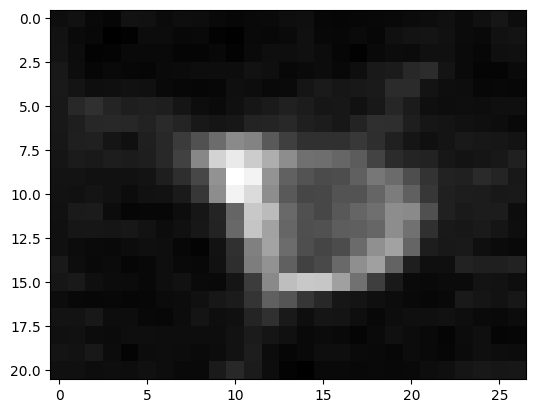

In [17]:
plt.imshow(cell1[115], cmap='gray')
# plt.scatter(20, 20)
# w, h = 20, 20

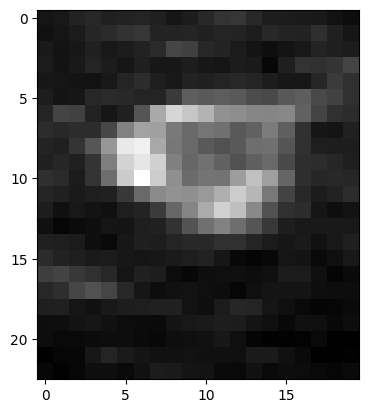

In [18]:
plt.imshow(cell2[871], cmap='gray')
# plt.scatter(7, 20)
# w, h = 7, 20

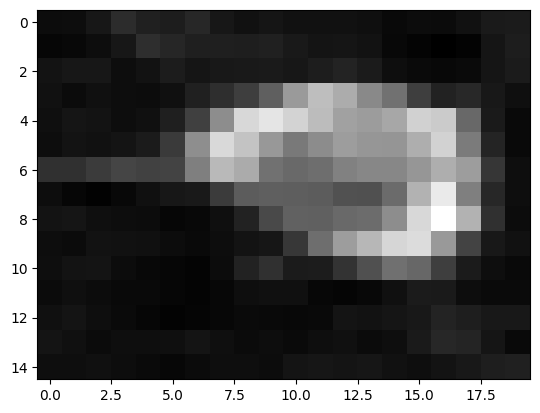

In [19]:
plt.imshow(cell3[1187], cmap='gray')
# plt.scatter(5, 12)
# w, h = 5, 12

Compare background pixel trace to cell pixel trace.

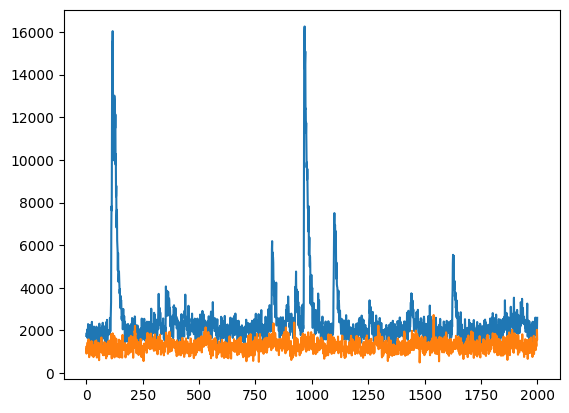

In [20]:
plt.plot(cell1[:, 9, 10])
plt.plot(cell1[:, 20, 20])

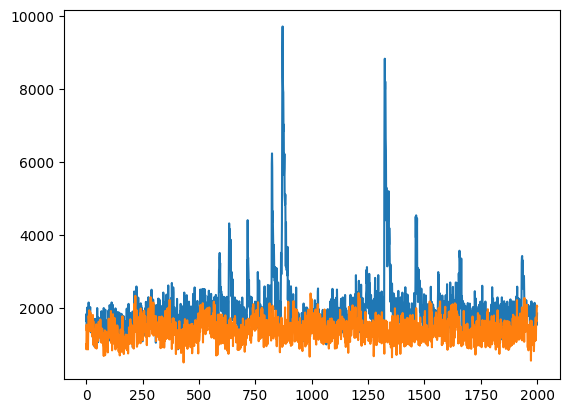

In [21]:
plt.plot(cell2[:, 10, 6])
plt.plot(cell2[:, 20, 7])

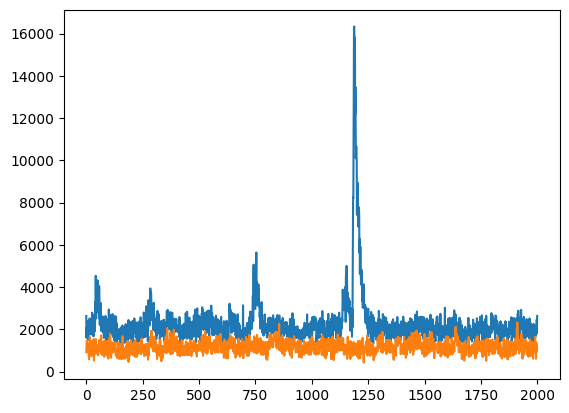

In [22]:
plt.plot(cell3[:, 8, 16])
plt.plot(cell3[:, 12, 5])

Scale background pixel trace.

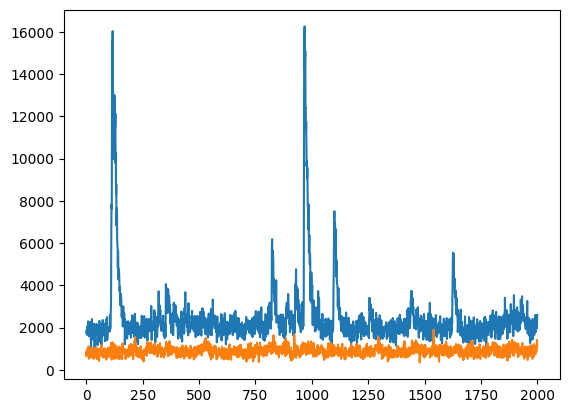

In [23]:
plt.plot(cell1[:, 9, 10])
plt.plot(0.7 * cell1[:, 20, 20])

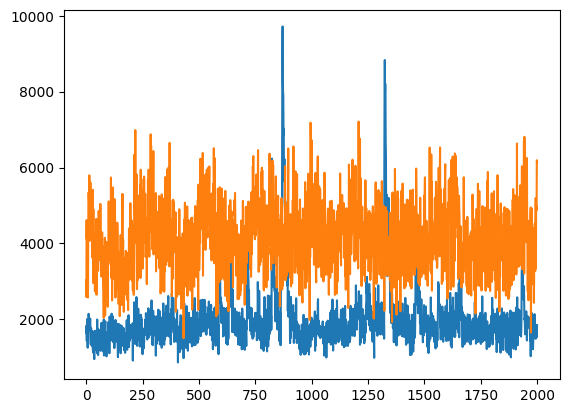

In [24]:
plt.plot(cell2[:, 10, 6])
plt.plot(3.0 * cell2[:, 20, 7])

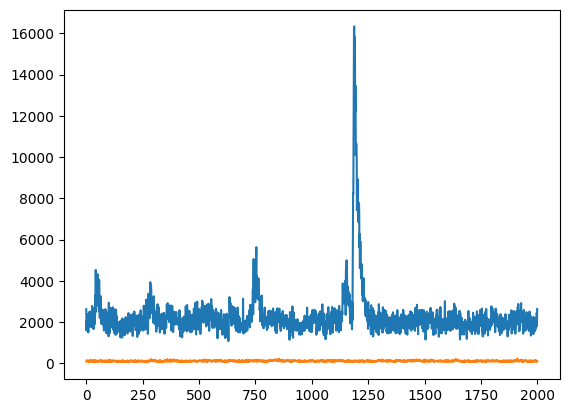

In [25]:
plt.plot(cell3[:, 8, 16])
plt.plot(0.1 * cell3[:, 12, 5])

Subtract scaled background pixel trace from cell trace.

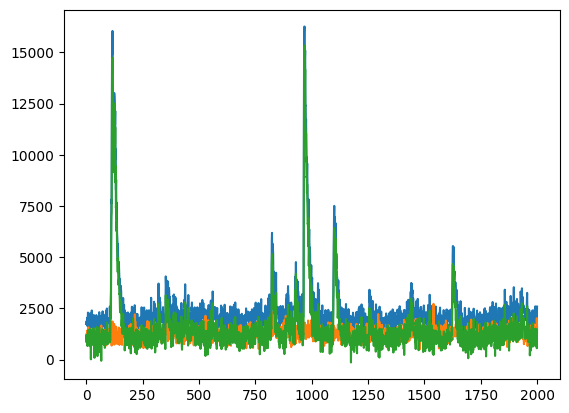

In [28]:
cell1_corr_trace = cell1[:, 9, 10] - 0.7 * cell1[:, 20, 20]
plt.plot(cell1[:, 9, 10])
plt.plot(cell1[:, 20, 20])
plt.plot(cell1_corr_trace)

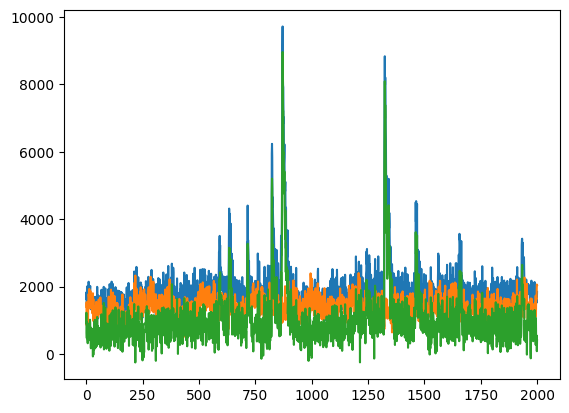

In [29]:
cell2_corr_trace = cell2[:, 10, 6] - 0.7 * cell2[:, 20, 7]
plt.plot(cell2[:, 10, 6])
plt.plot(cell2[:, 20, 7])
plt.plot(cell2_corr_trace)

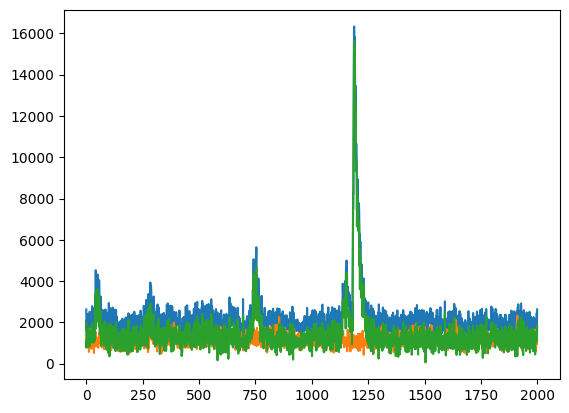

In [30]:
cell3_corr_trace = cell3[:, 8, 16] - 0.7 * cell3[:, 12, 5]
plt.plot(cell3[:, 8, 16])
plt.plot(cell3[:, 12, 5])
plt.plot(cell3_corr_trace)

## Estimating Baseline Fluorescence (F0).

Even when a neuron is not active, the signal is not zero because of slow change in signal or noise. This resting level of fluorescence is called **baseline flurorescence** or **F0**. 

In [32]:
cell1_corr_trace = cell1[:, 9, 10] - 0.7 * cell1[:, 20, 20]
cell2_corr_trace = cell2[:, 10, 6] - 0.7 * cell2[:, 20, 7]
cell3_corr_trace = cell3[:, 8, 16] - 0.7 * cell3[:, 12, 5]

median baseline (global) value

In [35]:
F0 = np.median(cell1_corr_trace)
F0

np.float64(1242.75)

In [36]:
F0 = np.median(cell2_corr_trace)
F0

np.float64(855.3)

In [37]:
F0 = np.median(cell3_corr_trace)
F0

np.float64(1258.3000000000002)

median baseline (global)

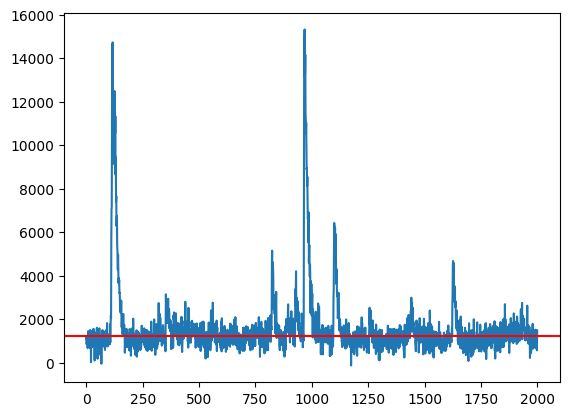

In [33]:
F0 = np.median(cell1_corr_trace)
plt.plot(cell1_corr_trace)
plt.axhline(F0, color='r')

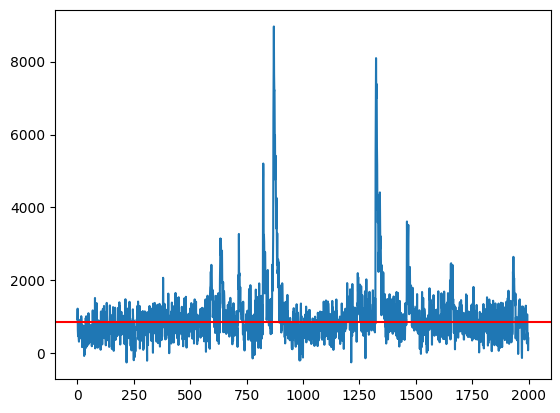

In [34]:
F0 = np.median(cell2_corr_trace)
plt.plot(cell2_corr_trace)
plt.axhline(F0, color='r')

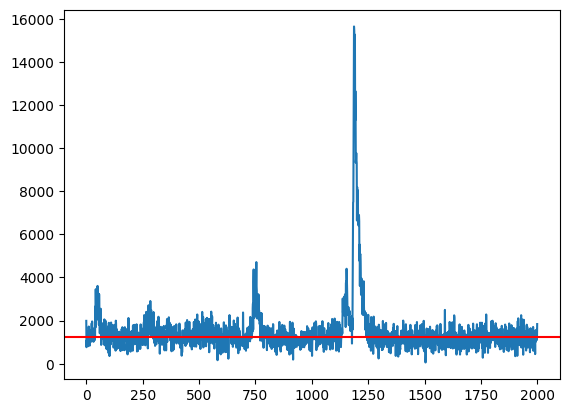

In [38]:
F0 = np.median(cell3_corr_trace)
plt.plot(cell3_corr_trace)
plt.axhline(F0, color='r')

low percentile baseline (global)

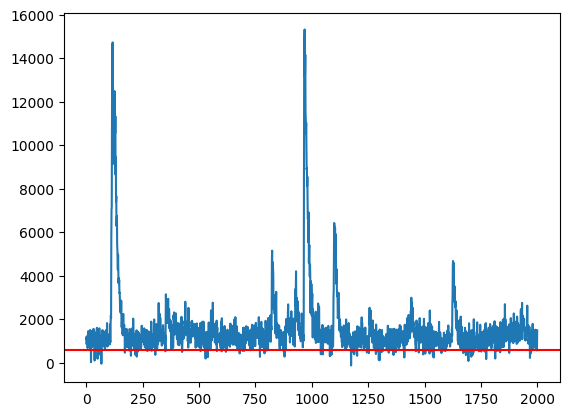

In [43]:
F0 = np.percentile(cell1_corr_trace, 5)
plt.plot(cell1_corr_trace)
plt.axhline(F0, color='r')

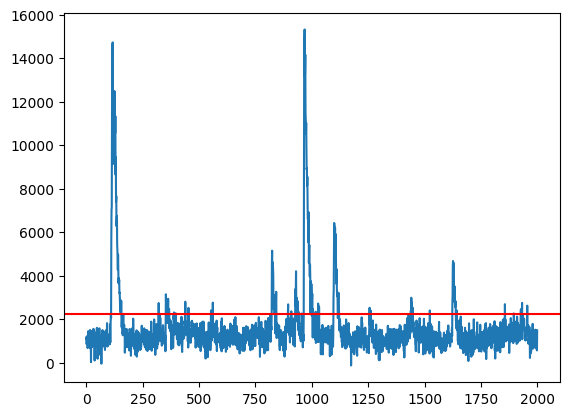

In [41]:
F0 = np.percentile(cell1_corr_trace, 90)
plt.plot(cell1_corr_trace)
plt.axhline(F0, color='r')

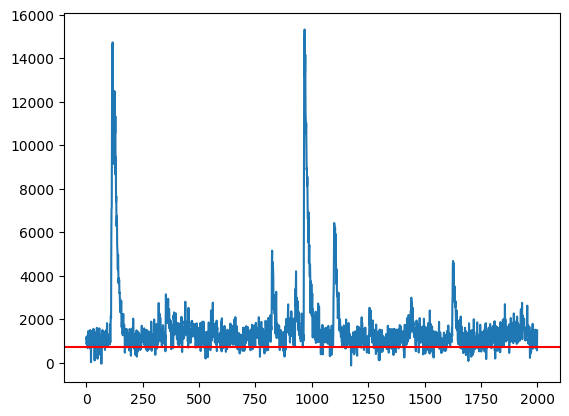

In [44]:
F0 = np.percentile(cell1_corr_trace, 10)
plt.plot(cell1_corr_trace)
plt.axhline(F0, color='r')

moving median (local)

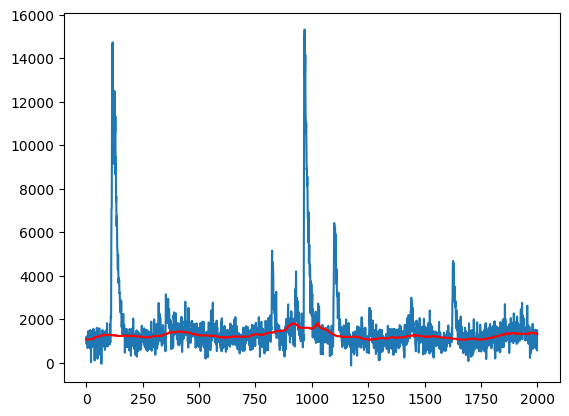

In [47]:
F0 = median_filter(cell1_corr_trace, 201)
plt.plot(cell1_corr_trace)
plt.plot(F0, color='r')

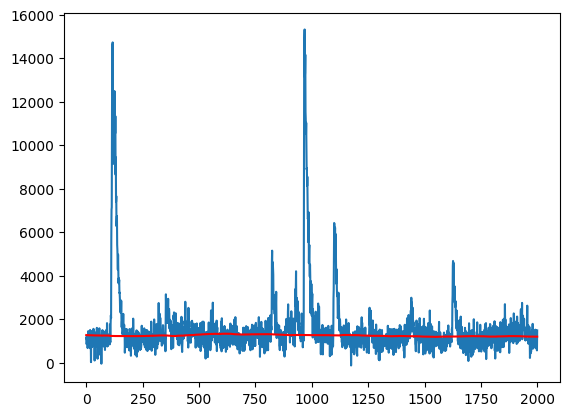

In [48]:
F0 = median_filter(cell1_corr_trace, 1001)
plt.plot(cell1_corr_trace)
plt.plot(F0, color='r')

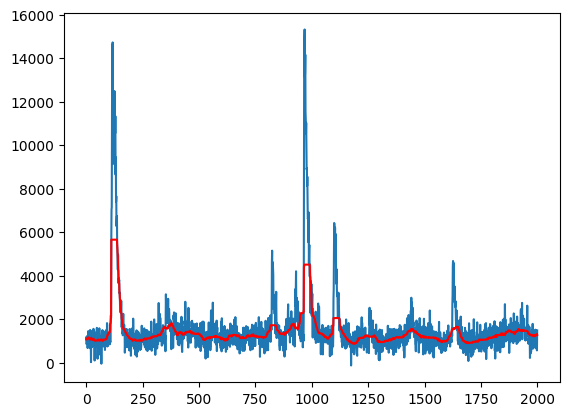

In [57]:
F0 = median_filter(cell1_corr_trace, 51)
plt.plot(cell1_corr_trace)
plt.plot(F0, color='r')

## dF/F0 Normalization.

We usually want to quantify how much the fluorescence signal increases relative to that baseline so that we can compare signals from different neurons. This is done by computing **ΔF/F₀**, where:

$\Delta F/F_0 = \frac{F - F_0}{F_0}$


Here, **F** is the fluorescence at each time point, and **ΔF** (delta F) is the difference between the current signal and the baseline. The resulting ΔF/F₀ value expresses the signal change as a **fraction of the baseline**, which is useful for comparing activity levels across different cells or imaging sessions.

Subtracting baseline (dF)

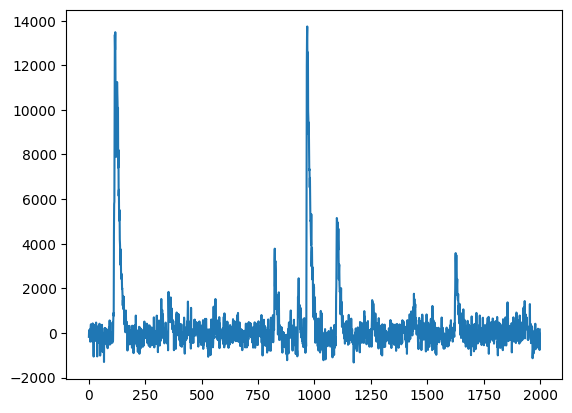

In [ ]:
F0 = median_filter(cell1_corr_trace, 201)
dF1 = cell1_corr_trace - F0
plt.plot(dF1)

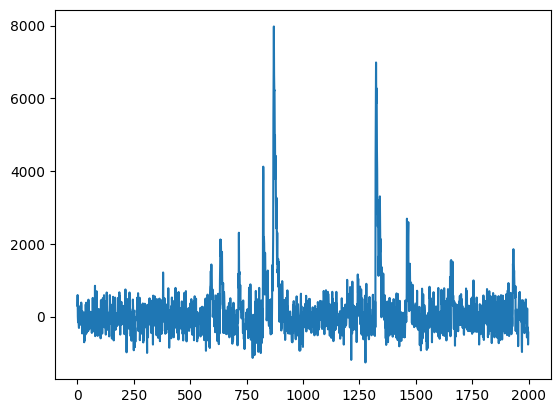

In [ ]:
F0 = median_filter(cell2_corr_trace, 201)
dF2 = cell2_corr_trace - F0
plt.plot(dF2)

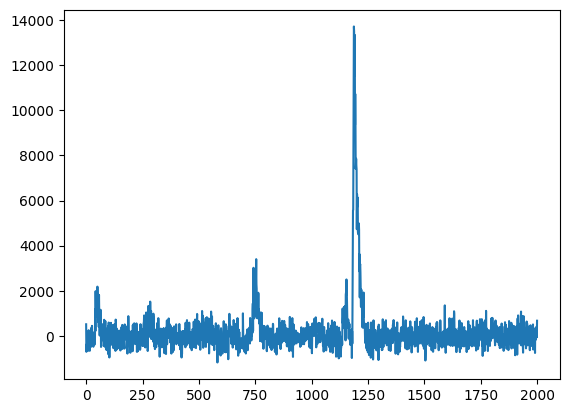

In [ ]:
F0 = median_filter(cell3_corr_trace, 201)
dF3 = cell3_corr_trace - F0
plt.plot(dF3)

dff

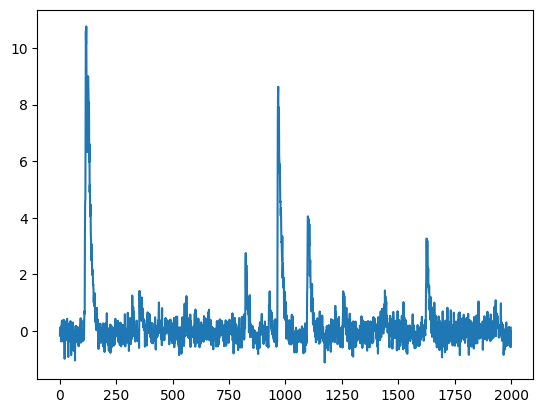

In [61]:
F0 = median_filter(cell1_corr_trace, 201)
dF1 = cell1_corr_trace - F0
dff1 = dF1 / F0
plt.plot(dff1)

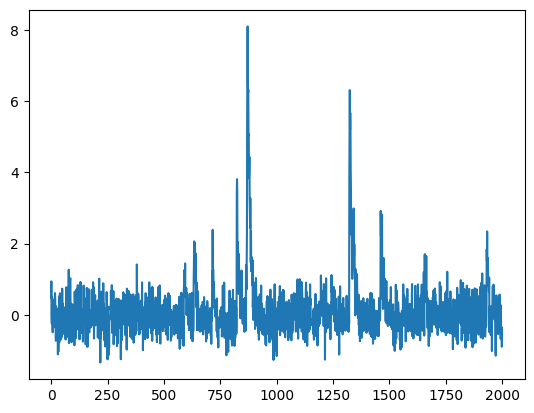

In [62]:
F0 = median_filter(cell2_corr_trace, 201)
dF2 = cell2_corr_trace - F0
dff2 = dF2 / F0
plt.plot(dff2)

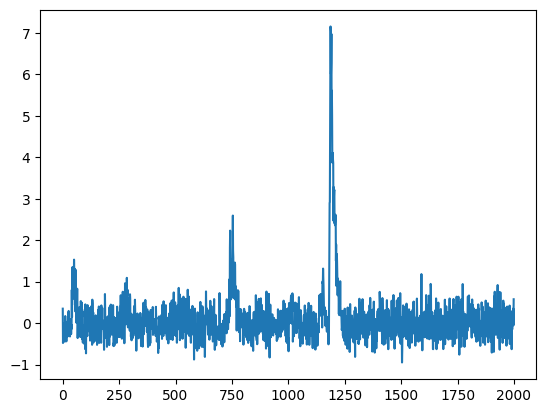

In [63]:
F0 = median_filter(cell3_corr_trace, 201)
dF3 = cell3_corr_trace - F0
dff3 = dF3 / F0
plt.plot(dff3)

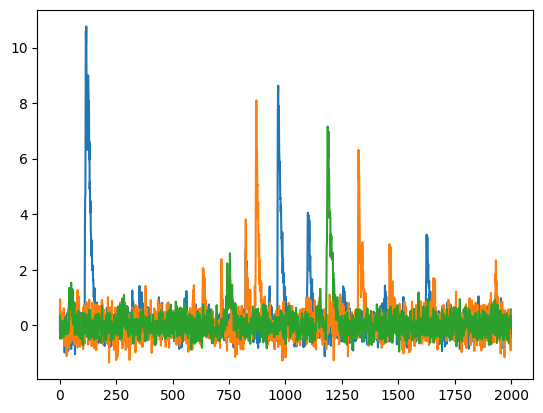

In [64]:
plt.plot(dff1)
plt.plot(dff2)
plt.plot(dff3)